# **Plant Weed Classification**



## **Context**

Can we differentiate a weed from a crop seedling?The ability to do so effectively can mean better crop yields and better stewardship of the environment.The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, hasrecently released a dataset containing images of unique plants belonging to 12 species at several growth stage.


## **Dataset**

We are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

Dataset:
The data file names are:
• images.npy
• Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

## **Problem Statement**

 The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.



#### Import necessary libraries. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from keras.utils import np_utils
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import precision_recall_fscore_support  
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Python program to check if two
# to get unique values from list
# importing counter from collections

from collections import Counter

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### **Reading the Training Data**

In [4]:
path = "/content/drive/My Drive/"

In [5]:
images=np.load("images.npy")

In [6]:
labels= pd.read_csv("Labels.csv")

In [7]:
labels

Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]

In [8]:
images=np.array(images)
labels=np.array(labels)
labels=np.reshape(labels, 4750 )
print("Shape of train_image:",images.shape,"Shape of train_label:",labels.shape)

Shape of train_image: (4750, 128, 128, 3) Shape of train_label: (4750,)


In [ ]:
labels.shape

(4750,)

In [ ]:
label_data = labels.copy()

### **Data Preprocessing** 

### **Exploratory Data Analysis**

In [ ]:
# Function to get unique values
def unique(list1):
    x = np.unique(np.array(list1))
    return(x)

In [ ]:
CATEGORIES = unique(label_data)
CATEGORIES

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [ ]:
#creating the dataframe to plot the pie chart
df=pd.DataFrame(label_data,columns=['Label'])

In [ ]:
df

Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]

**Lets see pie chart of different classes**

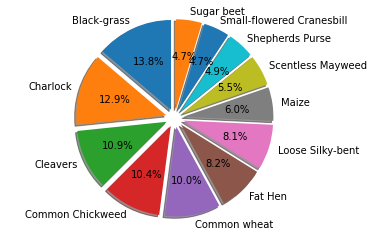

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels_list = CATEGORIES 
sizes = df['Label'].value_counts().tolist()

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(df['Label'].value_counts().tolist(), explode=explode, labels=labels_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The above plot shows that **13.8% of the plants are Black-grass** - Majority class: Black-Grass. Charlock, Cleavers, Common Chickweed and Common Wheat while 42.1% belong to minority classes.

**Let's visualize Plant images randomly from each of the twelve classes.** 




In [ ]:
label_df= pd.DataFrame(labels)

In [ ]:
label_df

0
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]

# **Raw Images**

In [ ]:
plants = []
for i in range(12):
    for j in range(3):
        plants.append([images[label_df[label_df[0]==CATEGORIES[i]].index.values[j]], CATEGORIES[i]]) 



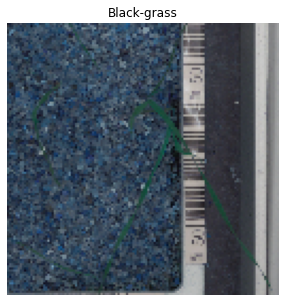

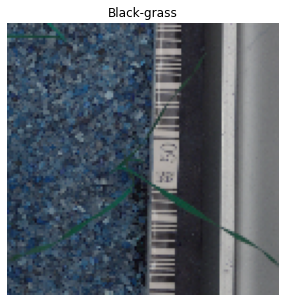

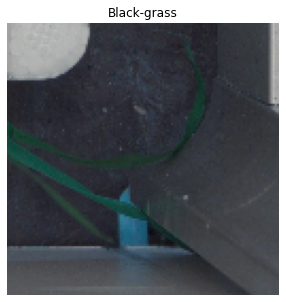

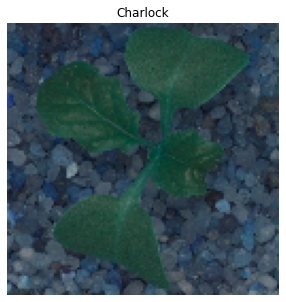

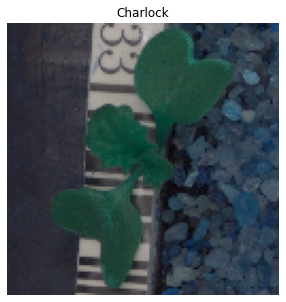

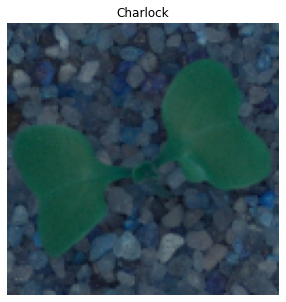

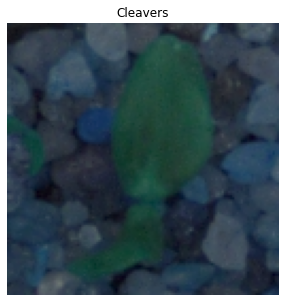

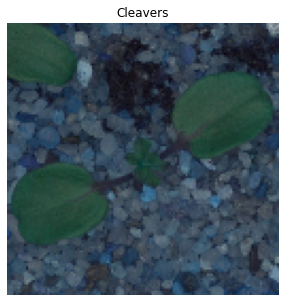

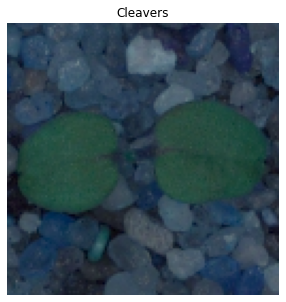

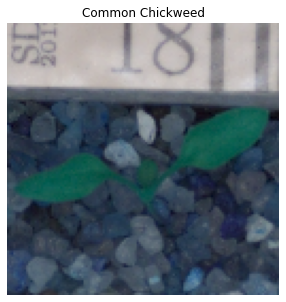

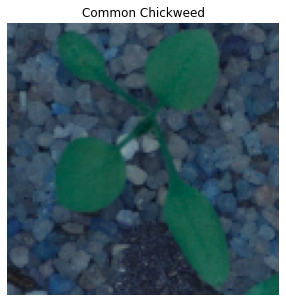

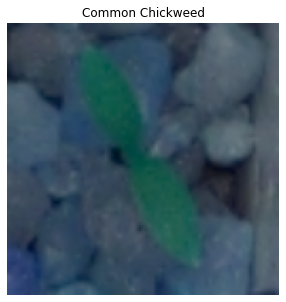

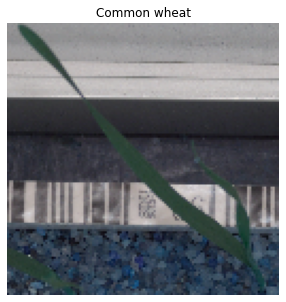

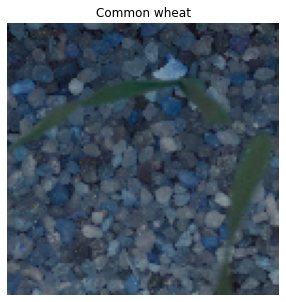

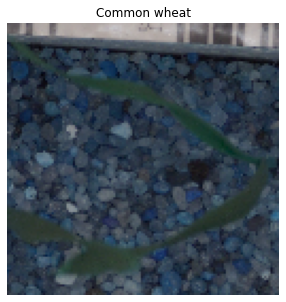

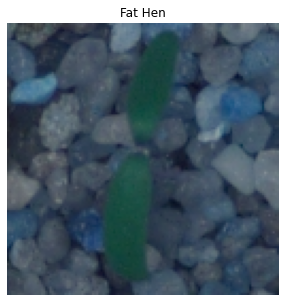

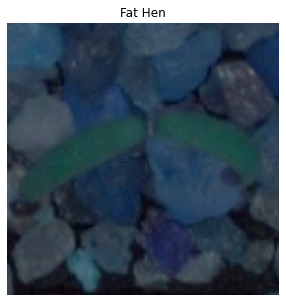

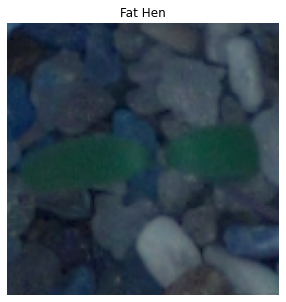

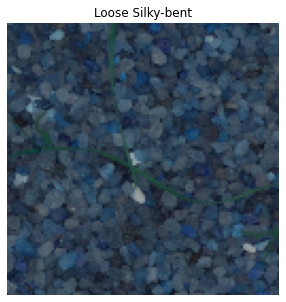

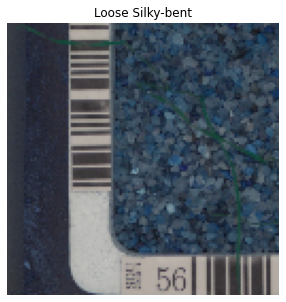

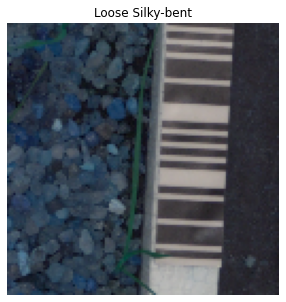

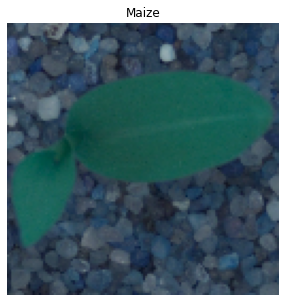

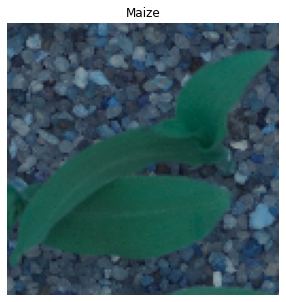

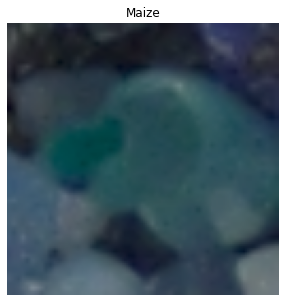

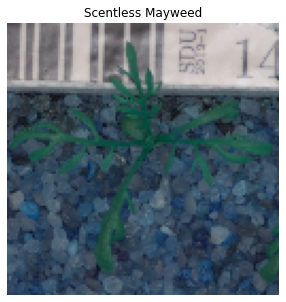

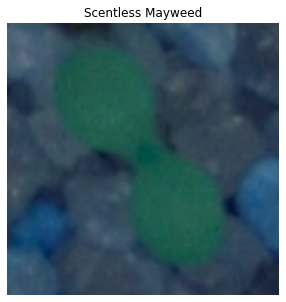

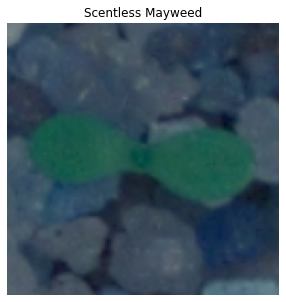

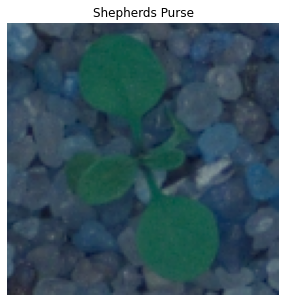

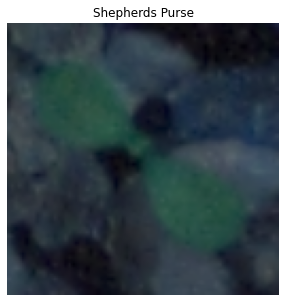

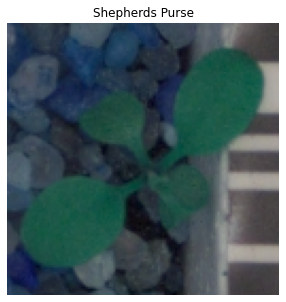

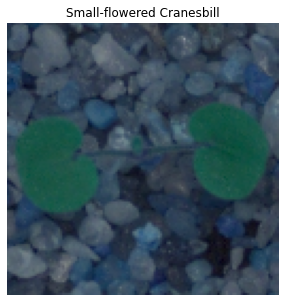

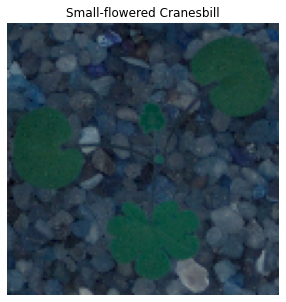

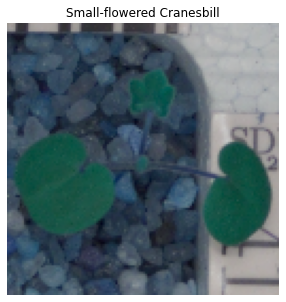

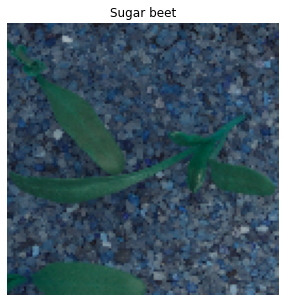

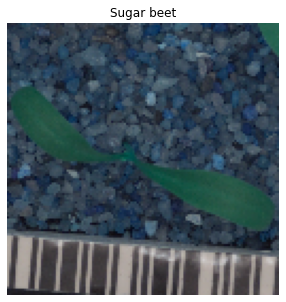

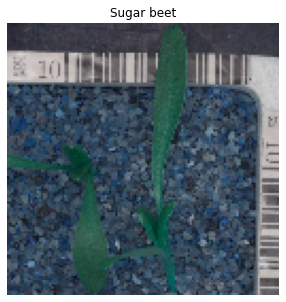

In [ ]:
i=1
for j, k in plants:   
        fig = plt.figure(figsize = (5,5))
        plt.imshow(j)
        label = k
        plt.title(label)
        plt.axis('off')
        plt.show()
        i+=1

# **We can see three random Images in each class**

As we can see from the raw images that its hard for human eyes to read the difference between the images and still find a difference in plants. All pictures are mixed with other objects and backgrounds making it harder to understand clearly the difference between simlar looking different species.


Now lets ee different filters/masks if any makes it easier for the computer to read the images.

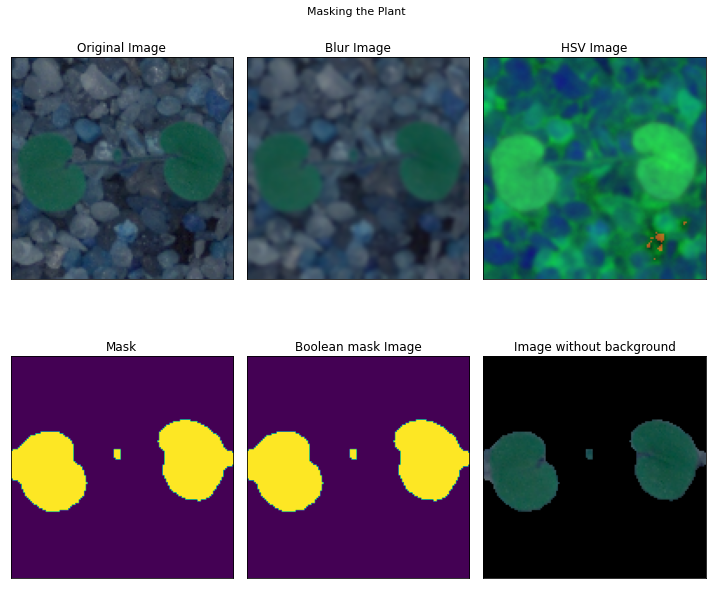

In [9]:
clearTrainImg = []
examples = []; 
getEx = True
plt.figure(figsize=(10,9))

for img in images:
    
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1)
        plt.imshow(img)  # Show the original image
        plt.xticks([])
        plt.yticks([]) 
        plt.title("Original Image")
        plt.subplot(2, 3, 2)
        plt.imshow(blurImg)  # Blur image
        plt.xticks([])
        plt.yticks([]) 
        plt.title("Blur Image")
        plt.subplot(2, 3, 3) 
        plt.imshow(hsvImg)  # HSV image
        plt.xticks([])
        plt.yticks([]) 
        plt.title("HSV Image")
        plt.subplot(2, 3, 4)
        plt.imshow(mask)  # Mask
        plt.xticks([])
        plt.yticks([]) 
        plt.title("Mask")
        plt.subplot(2, 3, 5)
        plt.imshow(bMask)  # Boolean mask
        plt.xticks([])
        plt.yticks([]) 
        plt.title("Boolean mask Image")
        plt.subplot(2, 3, 6)
        plt.imshow(clear)  # Image without background
        plt.xticks([])
        plt.yticks([]) 
        plt.title("Image without background")
        getEx = False

plt.suptitle("Masking the Plant", fontsize=11)
plt.tight_layout()
plt.show()

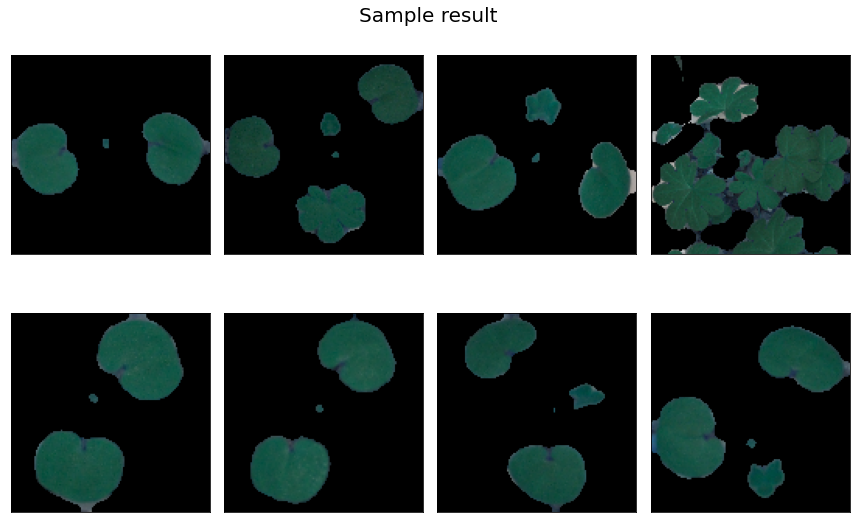

In [10]:
# Visulaising the sample result
clearTrainImg = np.asarray(clearTrainImg)
plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])
    plt.xticks([]), plt.yticks([])
    
plt.suptitle("Sample result", fontsize=20)  
plt.tight_layout()
plt.show()

The above filer shows the images without the background after cleaning.

In [11]:
CLASS = {
    'Black-grass': 0,
    'Charlock': 1,
    'Cleavers': 2,
    'Common Chickweed': 3,
    'Common wheat': 4,
    'Fat Hen': 5,
    'Loose Silky-bent': 6,
    'Maize': 7,
    'Scentless Mayweed': 8,
    'Shepherds Purse': 9,
    'Small-flowered Cranesbill': 10,
    'Sugar beet': 11
}

INV_CLASS = {CLASS[j]:j for j in CLASS}

In [1]:
CLASS[0]

NameError: name 'CLASS' is not defined

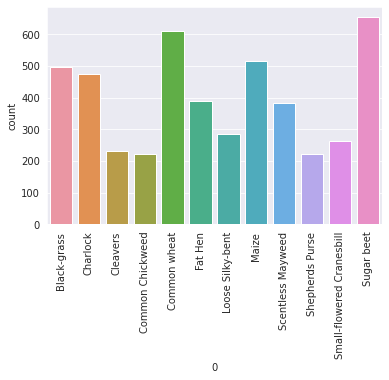

In [12]:
# Plot of label types numbers
classes = list(INV_CLASS.values())

sns.set_style('darkgrid')  
ax = sns.countplot(x=0, data=pd.DataFrame(labels))
ax.set_xticklabels(classes)

plt.xticks(rotation=90)
plt.show()

The above shows the training image distributiion in each class.

## **Model Data Preparation**

### **Normalization**

In [14]:
#Normalization
lb=LabelBinarizer()
label_data_binarized=lb.fit_transform(labels)

clearTrainImg = clearTrainImg / 255

Lets normalize the image data as shown above.

### **Splitting the Train and Test Data from the Cleaned, Normalized Image and Label data**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(clearTrainImg,label_data_binarized, shuffle=True, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3800, 128, 128, 3) (3800, 12)
(950, 128, 128, 3) (950, 12)


In [16]:
X_train.shape

(3800, 128, 128, 3)

In [17]:
type(X_train)

numpy.ndarray

In [18]:
Y_train.shape

(3800, 12)

### **Reading the Valiation Dataset**


In [19]:
#Split the train dataset
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(clearTrainImg,label_data_binarized, shuffle=True, test_size=0.2)
print(X_val.shape, Y_val.shape)
X_val = X_val.reshape(-1,128,128,3)

(950, 128, 128, 3) (950, 12)


In [20]:
X_val.shape

(950, 128, 128, 3)

In [21]:
Y_val.shape

(950, 12)

## **Adding random distortions**

In [22]:
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(X_train)

In [23]:
X_train=X_train.astype('float32') 
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

## **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [ ]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 x 3 = 2352 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
model_ann=create_model()
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               24576500  
                                                                 
 dense_4 (Dense)             (None, 700)               350700    
                                                                 
 dense_5 (Dense)             (None, 12)                8412      
                                                                 
Total params: 24,935,612
Trainable params: 24,935,612
Non-trainable params: 0
_________________________________________________________________


In [ ]:
type(Y_train)

numpy.ndarray

In [ ]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model_ann.fit(X_train,  Y_train,  
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
48/48 [==============================] - ETA: 0s - loss: 2.2022 - accuracy: 0.2553
Epoch 00001: val_accuracy improved from -inf to 0.35263, saving model to best_model.h5
48/48 [==============================] - 14s 280ms/step - loss: 2.2022 - accuracy: 0.2553 - val_loss: 1.7952 - val_accuracy: 0.3526
Epoch 2/200
48/48 [==============================] - ETA: 0s - loss: 1.6014 - accuracy: 0.4424
Epoch 00002: val_accuracy improved from 0.35263 to 0.40132, saving model to best_model.h5
48/48 [==============================] - 13s 278ms/step - loss: 1.6014 - accuracy: 0.4424 - val_loss: 1.6580 - val_accuracy: 0.4013
Epoch 3/200
48/48 [==============================] - ETA: 0s - loss: 1.4160 - accuracy: 0.5220
Epoch 00003: val_accuracy improved from 0.40132 to 0.50395, saving model to best_model.h5
48/48 [==============================] - 13s 272ms/step - loss: 1.4160 - accuracy: 0.5220 - val_loss: 1.4622 - val_accuracy: 0.5039
Epoch 4/200
48/48 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


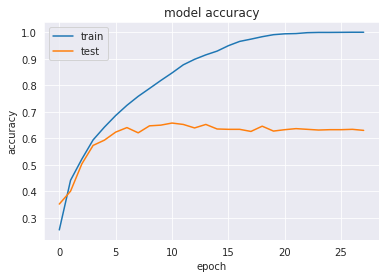

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model_ann.evaluate(X_val,Y_val)

30/30 [==============================] - 4s 130ms/step - loss: 1.7080 - accuracy: 0.6516


[1.7080307006835938, 0.651578962802887]

As we see here, the **ANN shows a test accuracy score of .65 **, since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
After 15 epoch, the test accuracy seems to be declining but train accuracy still incrasing, indicating overfitting.

In [32]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

### **Convolutional Neural Network (CNN)**

### **Model 1:** CNN with Dropout

In [24]:
tf.keras.backend.clear_session() #clear the weights

np.random.seed(2)  # Fix seed

model = Sequential([Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'),
                    BatchNormalization(axis=3),
                    Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
                    MaxPooling2D((2, 2)),
                    BatchNormalization(axis=3),
                    Dropout(0.1),
                    
                    Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
                    BatchNormalization(axis=3),
                    Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
                    MaxPooling2D((2, 2)),
                    BatchNormalization(axis=3),
                    Dropout(0.1),
                   
                    Conv2D(filters=256, kernel_size=(5, 5), activation='relu'),
                    BatchNormalization(axis=3),
                    Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
                    MaxPooling2D((2, 2)),
                    BatchNormalization(axis=3),
                    Dropout(0.1),
                   
                    Flatten(),
                    
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                   
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                   
                    Dense(12, activation='softmax')])

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],  run_eagerly=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                        

In [25]:
#Callback

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

model.fit(datagen. ......., steps_per_epoch=train_generator.samples/train_generator.batch_size, epochs=10, validation_data=validation_generator, validation_steps=validation_generator.samples/validation_generator.batch_size)

In [26]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    epochs=10,
                    steps_per_epoch=int(320/32),
                    validation_data=(X_val, Y_val),
                    validation_steps=int(160/32),
                    callbacks=[learning_rate_reduction])

Epoch 1/10
10/10 [==============================] - 358s 37s/step - loss: 3.6514 - accuracy: 0.1594 - val_loss: 2.9170 - val_accuracy: 0.2442 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 344s 36s/step - loss: 3.0119 - accuracy: 0.2438 - val_loss: 6.3898 - val_accuracy: 0.1674 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 344s 36s/step - loss: 2.7873 - accuracy: 0.2188 - val_loss: 13.5512 - val_accuracy: 0.1389 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 2.5000 - accuracy: 0.2719 
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
10/10 [==============================] - 345s 36s/step - loss: 2.5000 - accuracy: 0.2719 - val_loss: 18.0830 - val_accuracy: 0.1368 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 347s 36s/step - loss: 2.5558 - accuracy: 0.2531 - val_loss: 17.2414 - val_accuracy: 0.1368 - lr: 4.0000e-04
Epoch 6/10
10/10 [==============================] - 36

### ** :-) I am cutting this loop into shorter version for saving time to submit the project by lowering epoch and steps parameters**:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


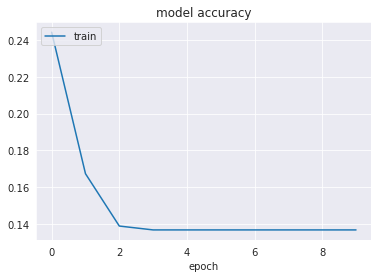

In [27]:
#Visualizing the training
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 1440x720 with 0 Axes>

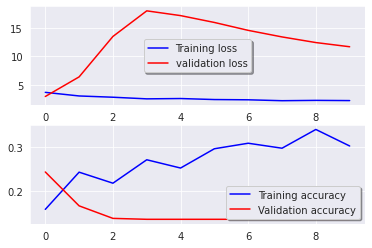

In [28]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

We can see that scores are horribly bad. Validation accuracy is very very low.

### **Convolutional Neural Network (CNN)** 

### **Model 2:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [33]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln2 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 8)       0         
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        3216      
                                                             

In [37]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln2 = model_ln2.fit(X_train, Y_train, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
7/7 [==============================] - ETA: 0s - loss: 2.3269 - accuracy: 0.2070 
Epoch 00001: val_accuracy improved from -inf to 0.42105, saving model to best_model.h5
7/7 [==============================] - 98s 13s/step - loss: 2.3269 - accuracy: 0.2070 - val_loss: 2.0710 - val_accuracy: 0.4211
Epoch 2/40
7/7 [==============================] - ETA: 0s - loss: 1.8993 - accuracy: 0.3743 
Epoch 00002: val_accuracy improved from 0.42105 to 0.52105, saving model to best_model.h5
7/7 [==============================] - 97s 14s/step - loss: 1.8993 - accuracy: 0.3743 - val_loss: 1.7044 - val_accuracy: 0.5211
Epoch 3/40
7/7 [==============================] - ETA: 0s - loss: 1.6396 - accuracy: 0.4325 
Epoch 00003: val_accuracy did not improve from 0.52105
7/7 [==============================] - 103s 14s/step - loss: 1.6396 - accuracy: 0.4325 - val_loss: 1.5458 - val_accuracy: 0.4947
Epoch 4/40
7/7 [==============================] - ETA: 0s - loss: 1.4594 - accuracy: 0.4962 
Epoch 00004

## **Plotting the Train & Validation Accuracy**

### **CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


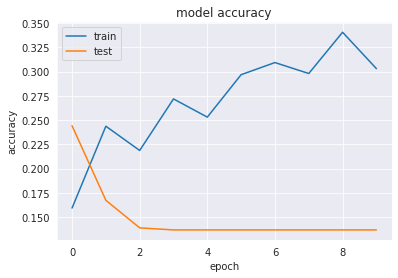

In [38]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see model accuracy on train data is not good at all.

### **CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


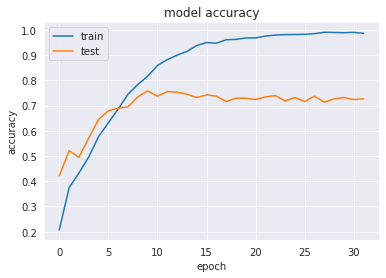

In [40]:
print(history_model_ln2.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln2.history['accuracy'])
plt.plot(history_model_ln2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see the model accuracy for Model 2 i good enough. It also depends on time and data used to train the models.

## **Model Evaluation**

### **CNN Model 1**

In [41]:
model.evaluate(X_test,Y_test)

30/30 [==============================] - 142s 5s/step - loss: 11.8809 - accuracy: 0.1253


[11.880934715270996, 0.12526315450668335]

### **CNN Model 2**

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

In [42]:
model_ln2.evaluate(X_test,Y_test)

30/30 [==============================] - 5s 175ms/step - loss: 0.3507 - accuracy: 0.9084


[0.3507194519042969, 0.9084210395812988]

**Accuracy on test data is very good at above 90%.**

## **Prediction**

Let us predict with best model with is model1


### **Prepare test Model for CNN Model 2**

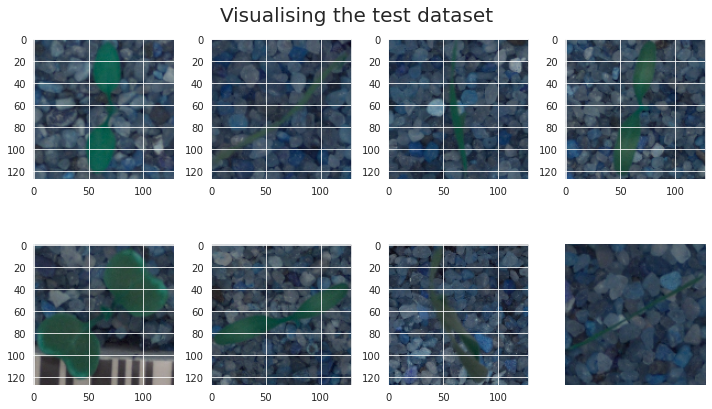

In [53]:
#Preparing to test the model
from glob import glob

files = glob(path+"data/*.png")

testImg = []

for img in files:
    testImg.append(cv2.resize(cv2.imread(img), (128, 128)))

testImg = np.asarray(testImg)  # Train images set

plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')    
    plt.imshow(testImg[i])


plt.suptitle("Visualising the test dataset", fontsize=20)    
plt.tight_layout()
plt.show()

## **Cleanse images for creating test data**

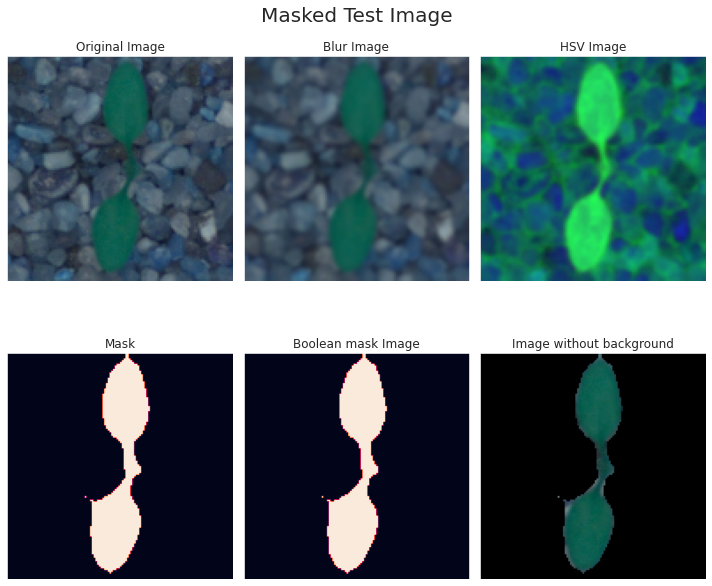

In [54]:
clearTestImg = []
examples = []; getEx = True
plt.figure(figsize=(10,9))

for img in testImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTestImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.xticks([]), plt.yticks([]), plt.title("Original Image")
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.xticks([]), plt.yticks([]), plt.title("Blur Image")
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.xticks([]), plt.yticks([]), plt.title("HSV Image")
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.xticks([]), plt.yticks([]), plt.title("Mask")
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.xticks([]), plt.yticks([]), plt.title("Boolean mask Image")
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        plt.xticks([]), plt.yticks([]), plt.title("Image without background")
        getEx = False

plt.suptitle("Masked Test Image", fontsize=20)
plt.tight_layout()
clearTestImg = np.asarray(clearTestImg)

In [55]:
#Normalizing the test data
clearTestImg = clearTestImg / 255

In [56]:
tf.config.run_functions_eagerly(True)
pred = model_ln2.predict(clearTestImg)
predNum = np.argmax(pred, axis=1)

testId = []
for i in files:
    testId.append(i.split('/')[-1]) 
    
predStr=[]
for i in predNum:
    predStr.append(INV_CLASS[i])
    
    

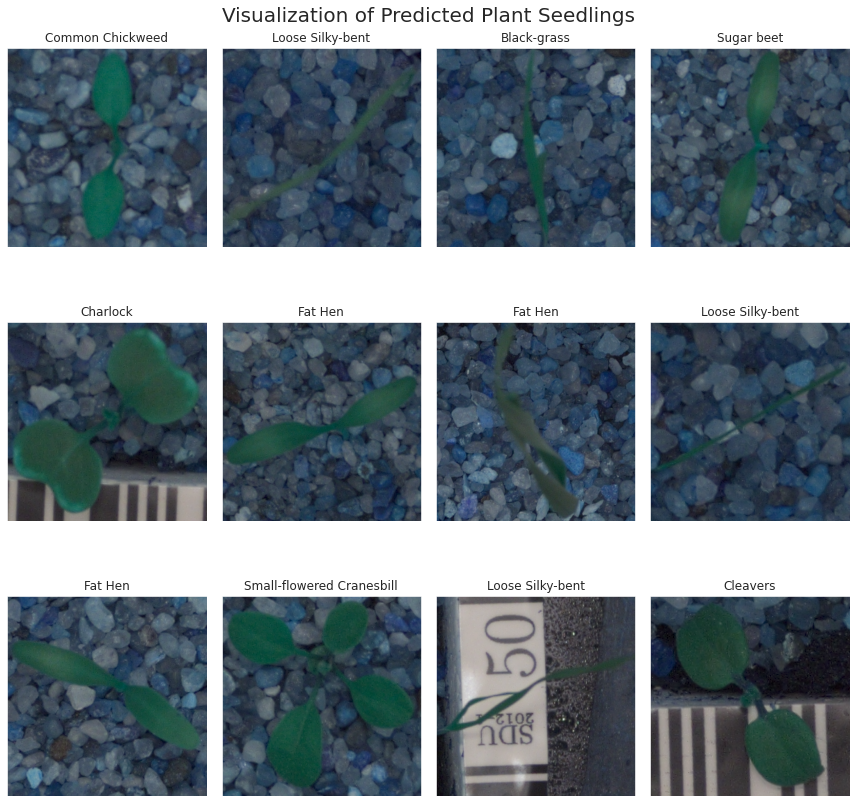

In [57]:
#Visualising Prediction

plt.figure(figsize=(12,12))

for i,j in enumerate(files[:12]):  
    
    plt.subplot(3,4,i+1)
    
    img = np.array(cv2.imread(j))
    plt.imshow(img)
    plt.title(predStr[i])
    plt.xticks([]), plt.yticks([])

plt.suptitle("Visualization of Predicted Plant Seedlings", fontsize=20)    
plt.tight_layout()
plt.show()

## **Conclusion**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better plant classifier. 


